# 12/4/19

Creating a MIMIC CSV for drain detection.

major changes to /lfs/1/jdunnmon/repos/mi-subsets/mimic/all_mimic_data.tsv:
1. now a CSV
2. has .jpg paths instead of .dcm paths
3. has drain labels

In [27]:
import os
import os.path as osp

from PIL import Image 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torchvision.transforms as transforms
from tqdm import tqdm

In [24]:
data_dir = '/lfs/1/jdunnmon/repos/mi-subsets/mimic/'
output_dir = ''

mimic_with_tubes_df = pd.read_csv(osp.join(data_dir, 'all_mimic_data_with_tubes_v2.tsv'), sep='\t', index_col=0)
mimic_df = pd.read_csv('/lfs/1/gangus/repositories/pytorch-classification/drain_detector/data/mimic/mimic_all.csv', index_col=0)


In [83]:
# idxs = list(mimic_with_tubes_df.index)
# mimic_df['drain'] = [0.0] * len(mimic_df)
# mimic_df.loc[idxs, 'drain'] = 1.0

mimic_df['path_image'] = [path[:-3] + 'jpg' for path in mimic_df['path_image']]
len(mimic_df.loc[mimic_df['ViewPosition'].isin({'PA', 'AP'})]) / len(mimic_df)

0.6452600037124446

In [82]:
print(len(mimic_df))
for split in mimic_df['split'].unique():
    split_total = sum(mimic_df['split'] == split)
    split_tubes = sum(mimic_df.loc[mimic_df['split'] == split]['drain'])
    split_tubes_front = sum(mimic_df.loc[mimic_df['ViewPosition'].isin({'PA', 'AP'})].loc[mimic_df['split'] == split]['drain'])
    print(split)
    print(split_total, split_tubes, split_tubes_front, split_tubes_front / split_total)
    print(split_tubes_front / split_tubes)
    print('--')


377110
train
368960 10921.0 9621.0 0.026075997398091934
0.8809632817507554
validate
2991 89.0 81.0 0.02708124373119358
0.9101123595505618
test
5159 166.0 129.0 0.025004845900368288
0.7771084337349398


In [75]:
print(mimic_df['ViewPosition'].unique())
mimic_df.loc[mimic_df['ViewPosition'] == 'PA']

# mimic_df_frontal = mimic_df.loc[mimic_df['ViewPosition'] != 'LATERAL']
# mimic_df.to_csv('/lfs/1/gangus/repositories/pytorch-classification/drain_detector/data/mimic/mimic_all.csv')

['PA' 'LATERAL' 'AP' 'LL' nan 'LAO' 'RAO' 'AP AXIAL' 'SWIMMERS' 'PA LLD'
 'AP LLD' 'XTABLE LATERAL' 'AP RLD' 'PA RLD' 'LPO']


,subject_id,study_id,path_report,raw_report,dicom_id,path_image,split,PerformedProcedureStepDescription,ViewPosition,Rows,...,Fracture Negbio,Lung Lesion Negbio,Lung Opacity Negbio,No Finding Negbio,Pleural Effusion Negbio,Pleural Other Negbio,Pneumonia Negbio,Pneumothorax Negbio,Support Devices Negbio,drain
0,10000032,50414267,files/p10/p10000032/s50414267.txt,EXAMINATION: CHEST (PA AND LAT) INDICATION: ...,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,files/p10/p10000032/s50414267/02aa804e-bde0afd...,train,CHEST (PA AND LAT),PA,3056,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0
2,10000032,53189527,files/p10/p10000032/s53189527.txt,EXAMINATION: CHEST (PA AND LAT) INDICATION: ...,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,files/p10/p10000032/s53189527/2a2277a9-b0ded15...,train,CHEST (PA AND LAT),PA,3056,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0
11,10000898,50771383,files/p10/p10000898/s50771383.txt,EXAMINATION: CHEST (PA AND LAT) INDICATION: ...,2a280266-c8bae121-54d75383-cac046f4-ca37aa16,files/p10/p10000898/s50771383/2a280266-c8bae12...,train,CHEST (PA AND LAT),PA,2544,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0
14,10000898,54205396,files/p10/p10000898/s54205396.txt,EXAMINATION: Chest radiograph. INDICATION: H...,b75df1bd-0f22d631-52d73526-2ae7b85a-d843b39d,files/p10/p10000898/s54205396/b75df1bd-0f22d63...,train,CHEST (PA AND LAT),PA,3056,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0
19,10000935,55697293,files/p10/p10000935/s55697293.txt,STUDY: PA and lateral chest x-ray. COMPARISON...,c50494f1-90e2bff5-e9189550-1a4562fd-6ab5204c,files/p10/p10000935/s55697293/c50494f1-90e2bff...,train,NaN,PA,2022,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377079,19999068,52434977,files/p19/p19999068/s52434977.txt,"INDICATION: Ethanol abuse, now with delirium....",4750f069-a4a2b152-61dadb2b-8e7c09a6-1c0578c2,files/p19/p19999068/s52434977/4750f069-a4a2b15...,train,Performed Desc,PA,1617,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0
377086,19999156,50847545,files/p19/p19999156/s50847545.txt,"CHEST, TWO VIEWS, ___ HISTORY: ___-year-old f...",8dc9f5e1-14887015-8db378ef-2fd4441a-d45ee0f3,files/p19/p19999156/s50847545/8dc9f5e1-1488701...,train,CHEST (PA AND LAT),PA,3056,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0
377098,19999287,53282218,files/p19/p19999287/s53282218.txt,"PA AND LATERAL CHEST, ___ HISTORY: Right uppe...",5a5eddf4-b64e5e49-f6e9c8bc-d6409b00-015470ea,files/p19/p19999287/s53282218/5a5eddf4-b64e5e4...,train,NaN,PA,2022,...,NaN,-1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0
377104,19999733,57132437,files/p19/p19999733/s57132437.txt,INDICATION: ___-year-old with chest pain. TEC...,3fcd0406-9b111603-feae7033-96632b3a-111333e5,files/p19/p19999733/s57132437/3fcd0406-9b11160...,train,CHEST (PA AND LAT),PA,3056,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0


In [69]:
# mimic_df.iloc[idxs[0]]['path_image']

NameError: name 'idxs' is not defined

['subject_id', 'study_id', 'path_report', 'raw_report', 'dicom_id', 'path_image', 'split', 'PerformedProcedureStepDescription', 'ViewPosition', 'Rows', 'Columns', 'StudyDate', 'StudyTime', 'ProcedureCodeSequence_CodeMeaning', 'ViewCodeSequence_CodeMeaning', 'PatientOrientationCodeSequence_CodeMeaning', 'Atelectasis Chexpert', 'Cardiomegaly Chexpert', 'Consolidation Chexpert', 'Edema Chexpert', 'Enlarged Cardiomediastinum Chexpert', 'Fracture Chexpert', 'Lung Lesion Chexpert', 'Lung Opacity Chexpert', 'No Finding Chexpert', 'Pleural Effusion Chexpert', 'Pleural Other Chexpert', 'Pneumonia Chexpert', 'Pneumothorax Chexpert', 'Support Devices Chexpert', 'Atelectasis Negbio', 'Cardiomegaly Negbio', 'Consolidation Negbio', 'Edema Negbio', 'Enlarged Cardiomediastinum Negbio', 'Fracture Negbio', 'Lung Lesion Negbio', 'Lung Opacity Negbio', 'No Finding Negbio', 'Pleural Effusion Negbio', 'Pleural Other Negbio', 'Pneumonia Negbio', 'Pneumothorax Negbio', 'Support Devices Negbio', 'drain']
PA
IN

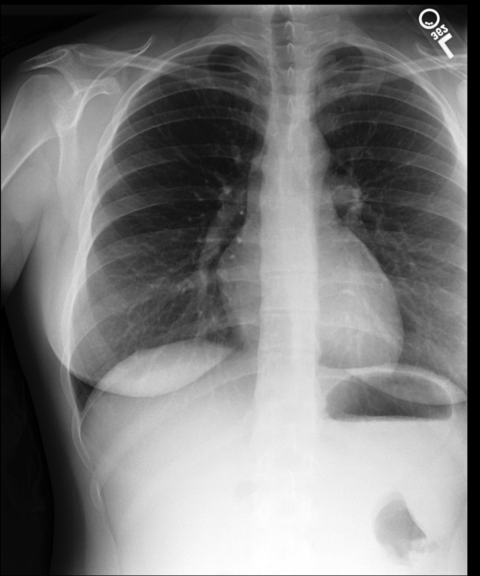

In [88]:
idx = 377105
print(list(mimic_df.keys()))
print(mimic_df.iloc[idx]['ViewPosition'])
print(mimic_df.iloc[idx]['raw_report'])
# Read image 
img = Image.open(f"/lfs/1/gangus/data/mimic-jpg/physionet.org/files/mimic-cxr-jpg/2.0.0/{mimic_df.iloc[idx]['path_image']}").convert('RGB') 
# np.array(img).shape
transforms.Resize(480)(img)
# Output Images 
# plt.imshow(img) 

In [4]:
chexnet_df = pd.read_csv('/lfs/1/gangus/repositories/pytorch-classification/drain_detector/data/chexnet/by-patient-id/split/valid.csv')

In [ ]:
# idx = 7
# img_path = chexnet_df.iloc[idx]['Image Index']
# img_drain = chexnet_df.iloc[idx]['drain']
# print(img_drain)
# Image.open(osp.join('/lfs/1/jdunnmon/data/nih/images/images', img_path))

In [1]:
from collections import Counter

Counter(list(chexnet_df['drain']))

NameError: name 'chexnet_df' is not defined

In [5]:
images_dir = '/lfs/1/gangus/repositories/pytorch-classification/catheter_detector/results/catheter_detect/chexnet/validation_set/test_latest/images'


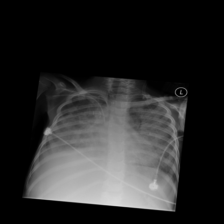

In [96]:
chexnet_image = Image.open(osp.join(images_dir, f"{chexnet_df.iloc[35]['Image Index'][:-4]}_real_A2.png"))
transforms.Resize(224)(chexnet_image)
# chexnet has random affine transforms built in...? see index 35

In [ ]:
chexnet_image

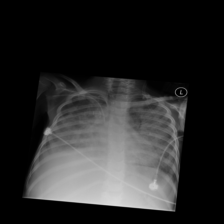

In [97]:
chexnet_image_raw = Image.open(osp.join('/lfs/1/jdunnmon/data/nih/images/images', chexnet_df.iloc[35]['Image Index']))
# np.array(chexnet_image_raw).shape
transforms.Resize(224)(chexnet_image_raw)